In [1]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
from tensorflow.python.framework import ops
from tf_utils import *
np.random.seed(1)

In [2]:
X_train_orig,Y_train_orig,X_test_orig,Y_test_orig,classes=load_dataset()

y=5


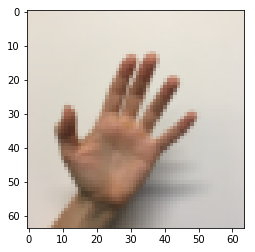

In [3]:
index=1079
plt.imshow(X_train_orig[index])
print("y="+str(np.squeeze(Y_train_orig[:,index])))
plt.show()

In [4]:
#X_train_orig[1079]
Y_train_orig.shape

(1, 1080)

In [5]:
X_train=X_train_orig/255.0
X_test=X_test_orig/255.0
Y_train=convert_to_one_hot(Y_train_orig,6)
Y_test=convert_to_one_hot(Y_test_orig,6)

In [6]:
Y_train.shape

(6, 1080)

In [7]:
def create_placeholder(num_px,channel,n_y):
    X=tf.placeholder(tf.float32,shape=(None,num_px,num_px,channel),name='X')
    Y=tf.placeholder(tf.float32,shape=(None,n_y),name='Y')
    return X,Y
X,Y=create_placeholder(64,3,6)
print("X="+str(X))
print("Y="+str(Y))

def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape,stddev=0.1))
def bias_variable(shape):
    return tf.Variable(tf.constant(0.1,shape=shape))
def conv2d(x,W):
    return tf.nn.conv2d(x,W,strides=[1,1,1,1],padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

def initialize_parameters():
    w_conv1=weight_variable([5,5,3,32])
    b_conv1=bias_variable([32])
    
    w_conv2=weight_variable([5,5,32,64])
    b_conv2=bias_variable([64])
    
    w_fc1=weight_variable([16*16*64,512])
    b_fc1=bias_variable([512])
    
    w_fc2=weight_variable([512,6])
    b_fc2=bias_variable([6])
    
    parameters={
        "w_conv1":w_conv1,
        "b_conv1":b_conv1,
        "w_conv2":w_conv2,
        "b_conv2":b_conv2,
        "w_fc1":w_fc1,
        "b_fc1":b_fc1,
        "w_fc2":w_fc2,
        "b_fc2":b_fc2
    }
    return parameters

X=Tensor("X:0", shape=(?, 64, 64, 3), dtype=float32)
Y=Tensor("Y:0", shape=(?, 6), dtype=float32)


In [8]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters=initialize_parameters()
    print("w_conv1:"+str(parameters["w_conv1"]))
    print("b_conv1:"+str(parameters["b_conv1"]))
    print("w_conv2:"+str(parameters["w_conv2"]))
    print("b_conv2:"+str(parameters["b_conv2"]))
    print("w_fc1:"+str(parameters["w_fc1"]))
    print("b_fc1:"+str(parameters["b_fc1"]))
    print("w_fc2:"+str(parameters["w_fc2"]))
    print("b_fc2:"+str(parameters["b_fc2"]))

w_conv1:<tf.Variable 'Variable:0' shape=(5, 5, 3, 32) dtype=float32_ref>
b_conv1:<tf.Variable 'Variable_1:0' shape=(32,) dtype=float32_ref>
w_conv2:<tf.Variable 'Variable_2:0' shape=(5, 5, 32, 64) dtype=float32_ref>
b_conv2:<tf.Variable 'Variable_3:0' shape=(64,) dtype=float32_ref>
w_fc1:<tf.Variable 'Variable_4:0' shape=(16384, 512) dtype=float32_ref>
b_fc1:<tf.Variable 'Variable_5:0' shape=(512,) dtype=float32_ref>
w_fc2:<tf.Variable 'Variable_6:0' shape=(512, 6) dtype=float32_ref>
b_fc2:<tf.Variable 'Variable_7:0' shape=(6,) dtype=float32_ref>


In [9]:
def forward_propagation(X,parameters):
    w_conv1=parameters["w_conv1"]
    b_conv1=parameters["b_conv1"]
    h_conv1=tf.nn.relu(conv2d(X,w_conv1)+b_conv1)
    h_pool1=max_pool_2x2(h_conv1)
    
    w_conv2=parameters["w_conv2"]
    b_conv2=parameters["b_conv2"]
    h_conv2=tf.nn.relu(conv2d(h_pool1,w_conv2)+b_conv2)
    h_pool2=max_pool_2x2(h_conv2)
    
    w_fc1=parameters["w_fc1"]
    b_fc1=parameters["b_fc1"]
    h_pool2_flat=tf.reshape(h_pool2,[-1,16*16*64])
    h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1)+b_fc1)
    
    #keep_prob=tf.placeholder(tf.float32)
    #h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)
    
    w_fc2=parameters["w_fc2"]
    b_fc2=parameters["b_fc2"]
    y_conv=tf.matmul(h_fc1,w_fc2)+b_fc2
    return y_conv

In [10]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholder(64,3,6)
    parameters=initialize_parameters()
    y_conv=forward_propagation(X,parameters)
    print("y_conv="+str(y_conv))

y_conv=Tensor("add_3:0", shape=(?, 6), dtype=float32)


In [11]:
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholder(64,3,6)
    parameters=initialize_parameters()
    y_conv=forward_propagation(X,parameters)
    print("y_conv="+str(y_conv))

y_conv=Tensor("add_3:0", shape=(?, 6), dtype=float32)


In [12]:
def compute_cost(y_conv,Y):
    #logits=tf.transpose(y_conv)
    #labels=tf.transpose(Y)
    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv,labels=Y))
    return cost
tf.reset_default_graph()
with tf.Session() as sess:
    X,Y=create_placeholder(64,3,6)
    parameters=initialize_parameters()
    y_conv=forward_propagation(X,parameters)
    cost=compute_cost(y_conv,Y)
    print("cost="+str(cost))

cost=Tensor("Mean:0", shape=(), dtype=float32)


In [13]:
def random_mini_batches1(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    Y=Y.T         #(1080,6)
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:].reshape((m,Y.shape[1]))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [14]:
Y_train.shape

(6, 1080)

In [15]:
X_train.shape

(1080, 64, 64, 3)

In [16]:
Y_test.shape

(6, 120)

In [17]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.001,num_epochs=20,minibatch_size=32,print_cost=True):
    ops.reset_default_graph()  #(1080, 64, 64, 3)
    tf.set_random_seed(1)      #Y_train(6, 1080)
    seed=3
    (m,num_px1,num_px2,c)=X_train.shape
    n_y=Y_train.shape[0]
    costs=[]
    X,Y=create_placeholder(64,3,6)
    parameters=initialize_parameters()
    
    Z3=forward_propagation(X,parameters)
    cost=compute_cost(Z3,Y)
    optm=tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    correct_prediction=tf.equal(tf.argmax(Z3,1),tf.argmax(Y,1))#居然忘记1了，所以一直出现损失越来越小了，但是准确率却一直是0
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    saver=tf.train.Saver(max_to_keep=3)
    with tf.Session() as sess:
        tf.global_variables_initializer().run()
        for epoch in range(num_epochs):
            epoch_cost=0
            num_minibatches=int(m/minibatch_size)
            seed+=1
            #下面输入要求（6，,1080）格式,所以要加个转置
            minibatches=random_mini_batches1(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                (minibatch_X,minibatch_Y)=minibatch
                _,minibatch_cost=sess.run([optm,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
                epoch_cost+=minibatch_cost/num_minibatches
            if(print_cost==True and epoch % 2==0):
                #print("Epoch",'%04d' % (epoch+1),"cost={:.9f}".format(epoch_cost))
                print("Cost after epoch %i:%f" % (epoch,epoch_cost))
            if(print_cost==True and epoch %1==0):
                costs.append(epoch_cost)
            saver.save(sess,'aa/mnist.ckpt',global_step=epoch+1)
                
        print("Train Accuracy:",accuracy.eval({X:X_train,Y:Y_train.T}))
        print("Test Accuracy:",accuracy.eval({X:X_test,Y:Y_test.T}))
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations(per tens)')
        plt.title("learning rate="+str(learning_rate))
        plt.show()
        
        parameters=sess.run(parameters)
        #print('Parameters have been trained!')
        #correct_prediction=tf.equal(tf.argmax(Z3),tf.argmax(Y))
        #accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
        #print("Train Accuracy:",accuracy.eval({X:X_train,Y:Y_train.T}))
        #print("Test Accuracy:",accuracy.eval({X:X_test,Y:Y_test.T}))
        return parameters

Cost after epoch 0:11.510230
Cost after epoch 2:1.032634
Cost after epoch 4:0.372764
Cost after epoch 6:0.125920
Cost after epoch 8:0.044199
Cost after epoch 10:0.034884
Cost after epoch 12:0.014829
Cost after epoch 14:0.006755
Cost after epoch 16:0.002090
Cost after epoch 18:0.000732
Train Accuracy: 1.0
Test Accuracy: 0.933333


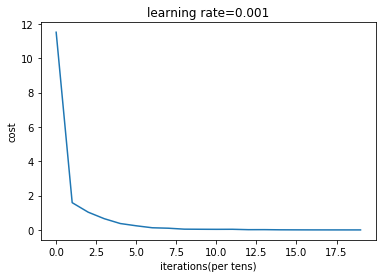

In [18]:
parameters=model(X_train,Y_train,X_test,Y_test)

In [19]:
saver=tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, "aa/mnist.ckpt-20")

INFO:tensorflow:Restoring parameters from aa/mnist.ckpt-20


In [20]:
def forward_propagation_for_predict(X, parameters):
    w_conv1=parameters["w_conv1"]
    b_conv1=parameters["b_conv1"]
    h_conv1=tf.nn.relu(conv2d(X,w_conv1)+b_conv1)
    h_pool1=max_pool_2x2(h_conv1)

    w_conv2=parameters["w_conv2"]
    b_conv2=parameters["b_conv2"]
    h_conv2=tf.nn.relu(conv2d(h_pool1,w_conv2)+b_conv2)
    h_pool2=max_pool_2x2(h_conv2)

    w_fc1=parameters["w_fc1"]
    b_fc1=parameters["b_fc1"]
    h_pool2_flat=tf.reshape(h_pool2,[-1,16*16*64])
    h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,w_fc1)+b_fc1)

    w_fc2=parameters["w_fc2"]
    b_fc2=parameters["b_fc2"]
    y_conv=tf.matmul(h_fc1,w_fc2)+b_fc2
    return y_conv

def predict(X,parameters):
    w_conv1 = tf.convert_to_tensor(parameters["w_conv1"])
    b_conv1 = tf.convert_to_tensor(parameters["b_conv1"])
    w_conv2 = tf.convert_to_tensor(parameters["w_conv2"])
    b_conv2 = tf.convert_to_tensor(parameters["b_conv2"])
    w_fc1 = tf.convert_to_tensor(parameters["w_fc1"])
    b_fc1 = tf.convert_to_tensor(parameters["b_fc1"])
    w_fc2 = tf.convert_to_tensor(parameters["w_fc2"])
    b_fc2 = tf.convert_to_tensor(parameters["b_fc2"])

    params = {"w_conv1": w_conv1,
              "b_conv1": b_conv1,
              "w_conv2": w_conv2,
              "b_conv2": b_conv2,
              "w_fc1": w_fc1,
              "b_fc1": b_fc1,
              "w_fc2": w_fc2,
              "b_fc2": b_fc2
             }
    x= tf.placeholder(tf.float32, [1,64,64,3])    
    y_conv=forward_propagation_for_predict(x,params)
    p=tf.arg_max(y_conv,1)
    with tf.Session() as sess:
        prediction=sess.run(p,feed_dict={x:X})
        #print("y_con:",y_conv.eval())
    return prediction


Instructions for updating:
Use `argmax` instead


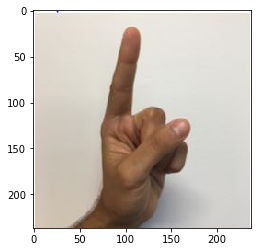

Your algorithm predicts:y=1
[1]


In [21]:
import scipy
from PIL import Image
from scipy import ndimage
my_image='thumbs_up2.jpg'
my_image='a.jpg'
fname="images/"+my_image
image=np.array(ndimage.imread(fname,flatten=False))

my_image=scipy.misc.imresize(image,size=(64,64)).reshape(1,64,64,3)
my_image_prediction=predict(my_image,parameters)
plt.imshow(image)
plt.show()
print("Your algorithm predicts:y="+str(np.squeeze(my_image_prediction)))
print(my_image_prediction)

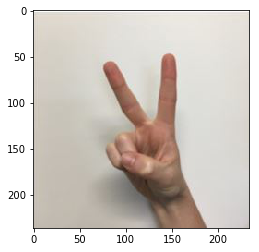

Your algorithm predicts:y=2
[2]


In [22]:
import scipy
from PIL import Image
from scipy import ndimage
my_image='thumbs_up2.jpg'
my_image='b.jpg'
fname="images/"+my_image
image=np.array(ndimage.imread(fname,flatten=False))

my_image=scipy.misc.imresize(image,size=(64,64)).reshape(1,64,64,3)
my_image_prediction=predict(my_image,parameters)
plt.imshow(image)
plt.show()
print("Your algorithm predicts:y="+str(np.squeeze(my_image_prediction)))
print(my_image_prediction)

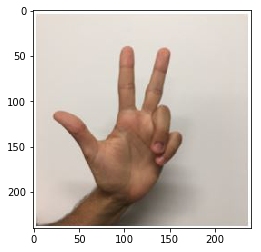

Your algorithm predicts:y=3
[3]


In [23]:
import scipy
from PIL import Image
from scipy import ndimage
my_image='thumbs_up2.jpg'
my_image='c.jpg'
fname="images/"+my_image
image=np.array(ndimage.imread(fname,flatten=False))

my_image=scipy.misc.imresize(image,size=(64,64)).reshape(1,64,64,3)
my_image_prediction=predict(my_image,parameters)
plt.imshow(image)
plt.show()
print("Your algorithm predicts:y="+str(np.squeeze(my_image_prediction)))
print(my_image_prediction)

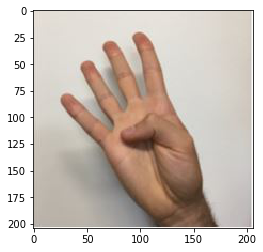

Your algorithm predicts:y=4
[4]


In [24]:
import scipy
from PIL import Image
from scipy import ndimage
my_image='thumbs_up2.jpg'
my_image='d.jpg'
fname="images/"+my_image
image=np.array(ndimage.imread(fname,flatten=False))

my_image=scipy.misc.imresize(image,size=(64,64)).reshape(1,64,64,3)
my_image_prediction=predict(my_image,parameters)
plt.imshow(image)
plt.show()
print("Your algorithm predicts:y="+str(np.squeeze(my_image_prediction)))
print(my_image_prediction)

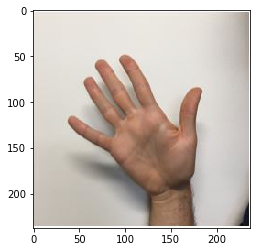

Your algorithm predicts:y=5
[5]


In [25]:
import scipy
from PIL import Image
from scipy import ndimage
my_image='thumbs_up2.jpg'
my_image='e.jpg'
fname="images/"+my_image
image=np.array(ndimage.imread(fname,flatten=False))

my_image=scipy.misc.imresize(image,size=(64,64)).reshape(1,64,64,3)
my_image_prediction=predict(my_image,parameters)
plt.imshow(image)
plt.show()
print("Your algorithm predicts:y="+str(np.squeeze(my_image_prediction)))
print(my_image_prediction)